In [1]:
import model_evaluation as me
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd

In [2]:
train,test = me.preparing_data()

In [3]:
train.shape,test.shape

((2450, 37), (1050, 37))

In [4]:
me.best_score()

{'candidate21': 1.0858919711164392}

In [47]:
minimum_error = me.best_score()["candidate21"]

In [6]:
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

<Axes: xlabel='NH4_7', ylabel='target'>

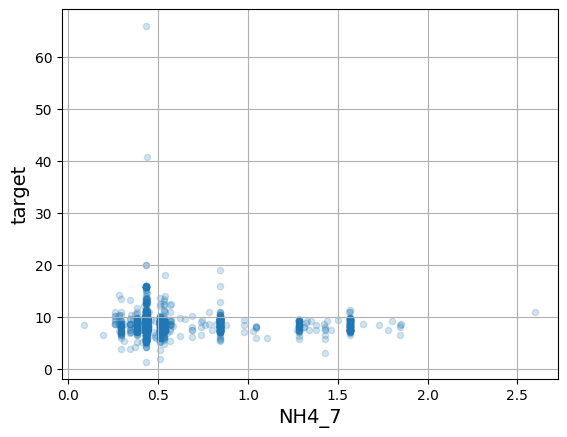

In [7]:
train.plot(kind="scatter", x="NH4_7", y="target", grid=True, alpha=0.2)

In [8]:
train[train["target"]>40.0]

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
316,316,40.78,40.90,40.90,9.500,6.805,5.01,8.76,6.805,0.49,...,9.805,4.53,4.42,4.8,3.500,4.650,6.025,5.070,3.850,4.14
451,451,65.93,40.95,65.95,9.265,6.625,5.01,8.37,6.375,0.71,...,7.795,1.73,1.78,4.1,4.645,4.725,5.725,10.645,3.025,3.80


<Axes: xlabel='BOD5_7', ylabel='target'>

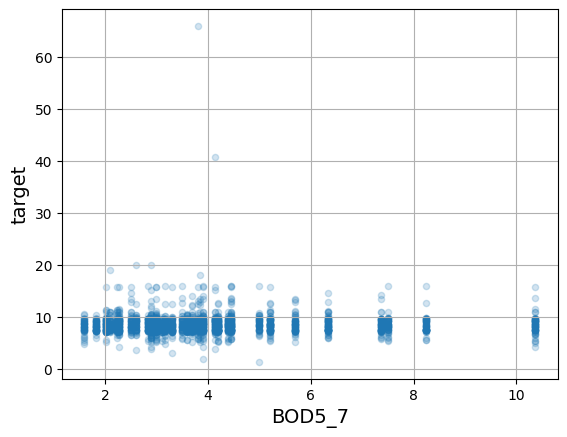

In [9]:
train.plot(kind="scatter", x="BOD5_7", y="target", grid=True, alpha=0.2)

In [10]:
candidate = train.copy()

In [11]:
#train.drop("id",axis=1,inplace=True)
train["id"] = 1.0

<Axes: xlabel='O2_1', ylabel='target'>

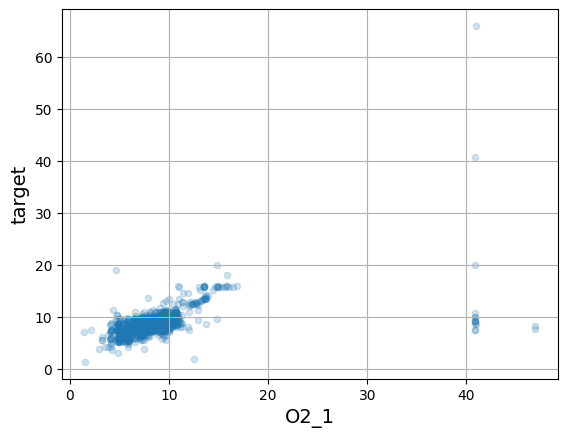

In [12]:
train.plot(kind="scatter", x="O2_1", y="target", grid=True, alpha=0.2)

<Axes: xlabel='O2_1', ylabel='target'>

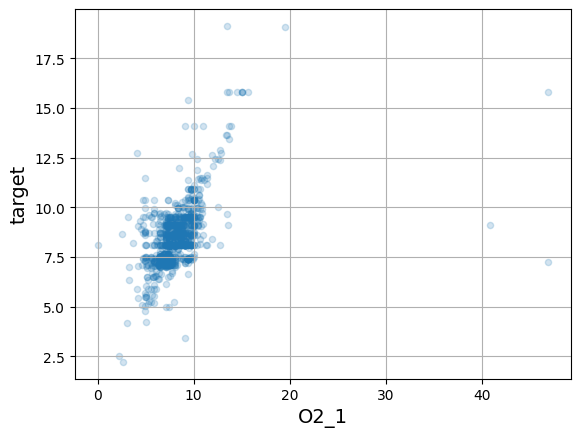

In [13]:
test.plot(kind="scatter", x="O2_1", y="target", grid=True, alpha=0.2)

<Axes: xlabel='O2_2', ylabel='target'>

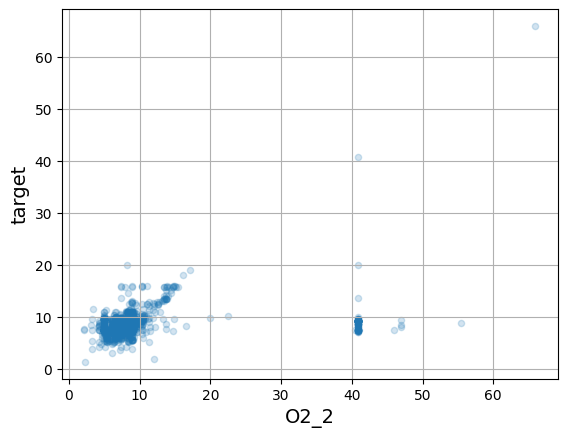

In [14]:
train.plot(kind="scatter", x="O2_2", y="target", grid=True, alpha=0.2)

In [15]:
candidate = train[train["target"]<40.0].copy()

In [16]:
errors = me.testing_candidate_data(candidate,test)

test error: 1.0885074399108097
train error: 0.7971046978066997


In [17]:
minimum_error

1.0858919711164392

In [18]:
candidate = train[train["target"]<40.0].copy()
errors = me.testing_candidate_data(candidate,test)
if errors[1]<minimum_error:
    print("improvement", errors[1])
    minimum_error = errors[1]

test error: 1.0885074399108097
train error: 0.7971046978066997


In [19]:
minimum_error

1.0858919711164392

In [20]:
candidate.shape

(2448, 37)

<Axes: xlabel='BOD5_6', ylabel='target'>

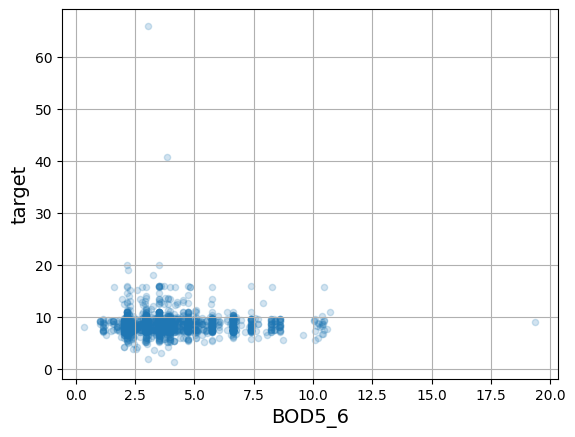

In [21]:
train.plot(kind="scatter", x="BOD5_6", y="target", grid=True, alpha=0.2)

In [22]:
candidate = train[train["BOD5_6"]<10.0].copy()
errors = me.testing_candidate_data(candidate,test)
if errors[1]<minimum_error:
    print("improvement", errors[1])
    minimum_error = errors[1]

test error: 1.0916400736713494
train error: 0.9581034415116072


<Axes: xlabel='O2_7', ylabel='target'>

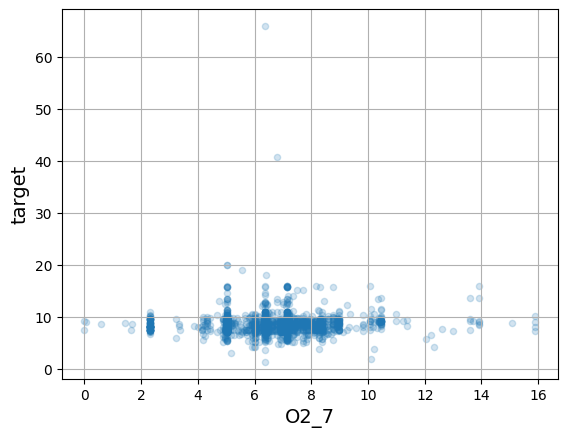

In [23]:
train.plot(kind="scatter", x="O2_7", y="target", grid=True, alpha=0.2)

In [24]:
candidate = train[:].copy()
candidate["O2_7"] = 1.0
errors = me.testing_candidate_data(candidate,test)
if errors[1]<minimum_error:
    print("improvement", errors[1])
    minimum_error = errors[1]

test error: 1.0892834144968246
train error: 0.9527969213354033


In [25]:


candidate = train[(train["target"]>=19.0) | (train["O2_1"]<=40.0)]
errors = me.testing_candidate_data(candidate,test)
if errors[1]<minimum_error:
    print("improvement", errors[1])
    minimum_error = errors[1]

test error: 1.5605347320473386
train error: 0.9173536465710789


In [26]:
candidate = pd.concat([train,test],ignore_index=True)
errors = me.testing_candidate_data(candidate,test)
if errors[1]<minimum_error:
    print("improvement", errors[1])
    minimum_error = errors[1]

test error: 0.9075555188625364
train error: 0.9498616091443677
improvement 0.9075555188625364


In [27]:
data = pd.read_csv("data/sample.csv")

In [28]:
data["id"] = 1.0

In [29]:
data.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.0,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1.0,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,...,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,0.0,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,...,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,1.0,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,...,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,1.0,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,...,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,1.0,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,1.0,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,...,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,1.0,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,...,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


In [30]:
candidate = data.copy()
errors = me.testing_candidate_data(candidate,test)
if errors[1]<minimum_error:
    print("improvement", errors[1])
    minimum_error = errors[1]

test error: 0.9096109337178739
train error: 0.9539093836873016


In [31]:
len(candidate.columns)

37

In [32]:
candidate.columns

Index(['id', 'target', 'O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7',
       'NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1',
       'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2',
       'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_2',
       'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7'],
      dtype='object')

In [33]:
candidate.to_csv("data/without_id.csv",index=False)

In [44]:

candidate = train.copy()
for col in candidate.columns:
    if col in [
            "id",
            "NH4_7",
            "BOD5_7",
            "NO2_3",
            "NO2_7",
            "NO3_1",
            "NO3_4",
            "NH4_3",
            "NH4_4",
            "NO2_4",
            "NO3_5",
            "BOD5_4",
            "BOD5_1",
            "BOD5_2",
            "NH4_2",
            "NO3_2",
            "NO2_1",
            "O2_3",
            "O2_6",
            "BOD5_6",
            "O2_7"
        ]:
        candidate[col] = 1.0
errors = me.testing_candidate_data(candidate,test)
if errors[1]<minimum_error:
    print("improvement", errors[1])
    minimum_error = errors[1]

test error: 1.0858919711164392
train error: 0.9560373759428026


<Axes: xlabel='O2_1', ylabel='target'>

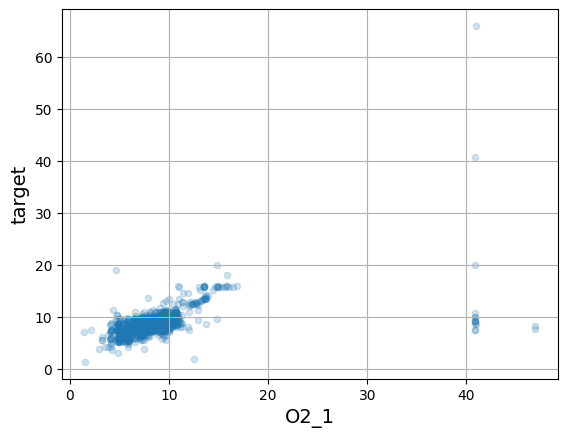

In [35]:
candidate.plot(kind="scatter", x="O2_1", y="target", grid=True, alpha=0.2)

<Axes: xlabel='O2_2', ylabel='target'>

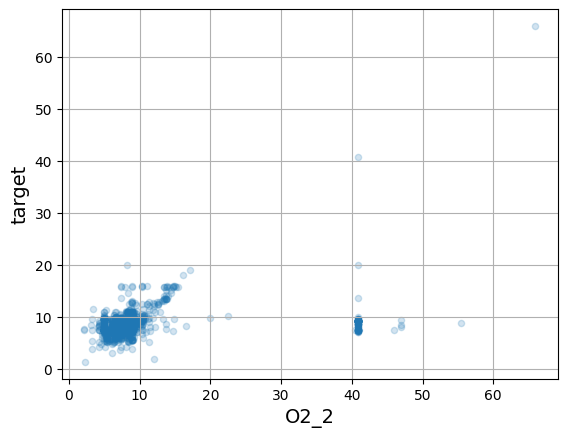

In [36]:
candidate.plot(kind="scatter", x="O2_2", y="target", grid=True, alpha=0.2)

<Axes: xlabel='O2_1', ylabel='target'>

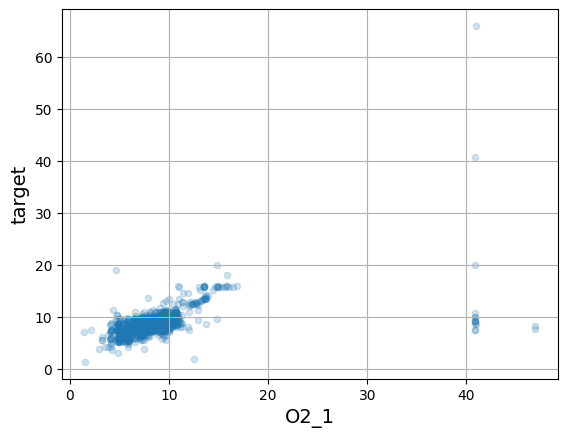

In [37]:
candidate.plot(kind="scatter", x="O2_1", y="target", grid=True, alpha=0.2)

In [40]:
candidate.shape

(2450, 37)

In [39]:
candidate.columns

Index(['id', 'target', 'O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7',
       'NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1',
       'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2',
       'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_2',
       'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7'],
      dtype='object')

In [38]:
errors[2]

array([0.        , 0.48039679, 0.32221614, 0.        , 0.00857169,
       0.00776903, 0.        , 0.        , 0.01037064, 0.        ,
       0.        , 0.        , 0.0072487 , 0.0124699 , 0.        ,
       0.        , 0.01135543, 0.        , 0.        , 0.00816513,
       0.00762549, 0.        , 0.        , 0.        , 0.00703336,
       0.        , 0.        , 0.01170408, 0.00715223, 0.        ,
       0.        , 0.00783335, 0.        , 0.09008805, 0.        ,
       0.        ])

In [41]:
cols_dropped = [
            "id",
            "NH4_7",
            "BOD5_7",
            "NO2_3",
            "NO2_7",
            "NO3_1",
            "NO3_4",
            "NH4_3",
            "NH4_4",
            "NO2_4",
            "NO3_5",
            "BOD5_4",
            "BOD5_1",
            "BOD5_2",
            "NH4_2",
            "NO3_2",
            "NO2_1",
            "O2_3",
            "O2_6",
            "BOD5_6",
            "O2_7"
        ]

In [43]:
train.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,2450.0,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,...,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,1.0,8.478547,8.265591,9.408269,9.622966,8.049571,5.678329,9.440200,6.565062,0.345427,...,8.715031,3.036095,3.231956,4.794777,4.746806,4.290611,5.976887,7.774585,3.750254,4.077871
std,0.0,2.015513,3.193192,7.028853,1.413385,1.472438,2.823657,0.999835,1.640957,0.298298,...,6.480303,2.961917,2.738025,1.983596,1.541834,2.060533,2.633368,3.712968,1.696331,1.913300
min,1.0,1.300000,1.490000,2.200000,4.900000,3.240000,0.200000,0.000000,0.000000,0.020000,...,0.044000,0.011000,0.105000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,1.0,7.460000,7.100000,7.367000,8.770000,6.830000,4.550000,8.980000,5.932500,0.215000,...,4.200000,1.420000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.600000,2.900000
50%,1.0,8.305000,7.900000,8.300000,9.545000,7.970000,5.800000,9.435000,6.480000,0.247000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.800000,7.400000,3.500000,3.700000
75%,1.0,9.110000,9.100000,8.750000,9.545000,9.265000,7.010000,10.070000,7.150000,0.360000,...,14.627500,3.455000,3.960000,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,1.0,65.930000,46.950000,65.950000,15.980000,21.800000,59.400000,14.900000,15.900000,4.200000,...,35.000000,19.355000,27.025000,11.650000,10.700000,12.250000,55.400000,82.450000,19.375000,10.370000


In [48]:
candidate = train.copy()
for col in candidate.columns:
    if col in cols_dropped:
        candidate[col] = 1.0

candidate2 = candidate.copy()
final_col = ""
for col in candidate.columns:
    if col not in cols_dropped and col!="target":
        candidate2 = candidate.copy()
        candidate2[col] = 1.0
        errors = me.testing_candidate_data(candidate2,test)
        if errors[1]<minimum_error:
            print("improvement",col, errors[1])
            minimum_error = errors[1]
            final_col = col

test error: 1.2975586194203599
train error: 1.150701122851001
test error: 1.1412983379196109
train error: 0.976797776616223
test error: 1.0917871881955146
train error: 0.9586677302582248
test error: 1.0873303661685385
train error: 0.95628449307588
test error: 1.0849439465630228
train error: 0.9615286866137065
improvement NH4_1 1.0849439465630228
test error: 1.0877579083794802
train error: 0.9530722979302619
test error: 1.0958109811670635
train error: 0.9573424778766277
test error: 1.0931409838905102
train error: 0.9590756256352729
test error: 1.0857953736305745
train error: 0.9578531008220875
test error: 1.0867351566373893
train error: 0.956057170937884
test error: 1.0860266417087778
train error: 0.957531170143432
test error: 1.0820633176348688
train error: 0.9546191535623901
improvement NO3_6 1.0820633176348688
test error: 1.0852739573950678
train error: 0.9561961324175664
test error: 1.091688704842342
train error: 0.9566499149743191
test error: 1.1106717591896755
train error: 0.93677

In [49]:
candidate = train.copy()
cols_dropped.append("NO3_6")
for col in candidate.columns:
    if col in cols_dropped:
        candidate[col] = 1.0

errors = me.testing_candidate_data(candidate,test)
if errors[1]<minimum_error:
    print("improvement", errors[1])
    minimum_error = errors[1]

test error: 1.0820633176348688
train error: 0.9546191535623901


In [50]:
candidate.to_csv("data/dropping_NO3_6.csv",index=False)

In [51]:
data = pd.read_csv("data/sample.csv")

In [52]:
data.shape

(3500, 37)

In [53]:
errors[0]

0.9546191535623901

In [54]:
errors = me.testing_candidate_data(data,test)

test error: 0.9095991402759913
train error: 0.9543962990847434


In [55]:
errors[0]

0.9543962990847434

In [56]:
candidate = data.copy()

In [57]:
candidate["id"] = 1.0

In [58]:
errors = me.testing_candidate_data(candidate,test)

test error: 0.9096109337178739
train error: 0.9539093836873016


In [59]:
without_id = pd.read_csv("data/without_id.csv")

In [61]:
(candidate == without_id).all(axis=None)

True

In [63]:
cols_dropped = [
            "id",
            "NH4_7",
            "BOD5_7",
            "NO2_3",
            "NO2_7",
            "NO3_1",
            "NO3_4",
            "NH4_3",
            "NH4_4",
            "NO2_4",
            "NO3_5",
            "BOD5_4",
            "BOD5_1",
            "BOD5_2",
            "NH4_2",
            "NO3_2",
            "NO2_1",
            "O2_3",
            "O2_6",
            "BOD5_6",
            "O2_7"
        ]

In [64]:
candidate = data.copy()
for col in candidate.columns:
    if col in cols_dropped:
        candidate[col] = 1.0
errors = me.testing_candidate_data(candidate,test)

test error: 0.9265876074894234
train error: 0.9609321705638283


In [65]:
data.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,...,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1010.507298,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,...,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,0.000000,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,...,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,874.750000,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,...,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,1749.500000,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,2624.250000,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,...,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,3499.000000,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,...,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


In [66]:
candidate.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.0,3500.000000,3500.000000,3500.000000,3500.0,3500.000000,3500.000000,3500.0,3500.0,3500.000000,...,3500.0,3500.000000,3500.000000,3500.0,3500.0,3500.000000,3500.0,3500.000000,3500.0,3500.0
mean,1.0,8.473834,8.216993,9.291581,1.0,8.065733,5.671581,1.0,1.0,0.340525,...,1.0,3.002243,3.242654,1.0,1.0,4.285660,1.0,7.837995,1.0,1.0
std,0.0,1.885712,3.040743,6.817822,0.0,1.463881,2.721399,0.0,0.0,0.284751,...,0.0,2.918355,2.713923,0.0,0.0,2.093388,0.0,3.724861,0.0,0.0
min,1.0,1.300000,0.000000,0.000000,1.0,2.300000,0.200000,1.0,1.0,0.020000,...,1.0,0.011000,0.000000,1.0,1.0,0.850000,1.0,2.020000,1.0,1.0
25%,1.0,7.470000,7.100000,7.300000,1.0,6.830000,4.550000,1.0,1.0,0.214500,...,1.0,1.140000,1.780000,1.0,1.0,2.290000,1.0,5.725000,1.0,1.0
50%,1.0,8.280000,7.890000,8.300000,1.0,7.980000,5.800000,1.0,1.0,0.247000,...,1.0,1.730000,1.800000,1.0,1.0,3.950000,1.0,7.500000,1.0,1.0
75%,1.0,9.110000,9.100000,8.700000,1.0,9.265000,7.015000,1.0,1.0,0.370000,...,1.0,3.025000,4.237500,1.0,1.0,4.725000,1.0,8.400000,1.0,1.0
max,1.0,65.930000,46.950000,65.950000,1.0,21.800000,59.400000,1.0,1.0,4.200000,...,1.0,19.355000,27.025000,1.0,1.0,19.800000,1.0,82.450000,1.0,1.0


In [67]:
candidate.to_csv("data/dropping_cols_without_test.csv",index=False)